In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/Users/shivamsourav/Desktop/global.csv')

In [7]:
df = df.set_index('Date_reported')

In [8]:
df.shape

(274920, 7)

In [9]:
df.head(3)

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0


# COUNTRY NAMES

In [10]:
country = df['Country'].unique()

In [11]:
print(country)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 'Côte d’Ivoire' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Falkland Islands (Malvinas)'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'Fren

# FOR INDIA

In [12]:
ind = df[df['Country']=='India']

In [13]:
ind

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,IN,India,SEARO,0,0,0,0
2020-01-04,IN,India,SEARO,0,0,0,0
2020-01-05,IN,India,SEARO,0,0,0,0
2020-01-06,IN,India,SEARO,0,0,0,0
2020-01-07,IN,India,SEARO,0,0,0,0
...,...,...,...,...,...,...,...
2023-03-03,IN,India,SEARO,283,44687162,0,530772
2023-03-04,IN,India,SEARO,334,44687496,3,530775
2023-03-05,IN,India,SEARO,324,44687820,0,530775


In [14]:
ind.isnull().sum()

Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [15]:
covid = ind.drop(['Country_code','Country','WHO_region'],axis=1)

In [16]:
covid

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2020-01-03,0,0,0,0
2020-01-04,0,0,0,0
2020-01-05,0,0,0,0
2020-01-06,0,0,0,0
2020-01-07,0,0,0,0
...,...,...,...,...
2023-03-03,283,44687162,0,530772
2023-03-04,334,44687496,3,530775
2023-03-05,324,44687820,0,530775


In [17]:
covid.index = pd.to_datetime(covid.index)

In [18]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1160 entries, 2020-01-03 to 2023-03-07
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   New_cases          1160 non-null   int64
 1   Cumulative_cases   1160 non-null   int64
 2   New_deaths         1160 non-null   int64
 3   Cumulative_deaths  1160 non-null   int64
dtypes: int64(4)
memory usage: 45.3 KB


In [21]:
covid.style.background_gradient(cmap='Reds')

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2020-01-03 00:00:00,0,0,0,0
2020-01-04 00:00:00,0,0,0,0
2020-01-05 00:00:00,0,0,0,0
2020-01-06 00:00:00,0,0,0,0
2020-01-07 00:00:00,0,0,0,0
2020-01-08 00:00:00,0,0,0,0
2020-01-09 00:00:00,0,0,0,0
2020-01-10 00:00:00,0,0,0,0
2020-01-11 00:00:00,0,0,0,0


<AxesSubplot:xlabel='Date_reported'>

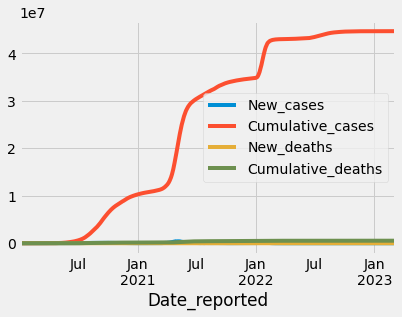

In [22]:
covid.plot()

In [26]:
covid.index.day

Int64Index([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
            ...
            26, 27, 28,  1,  2,  3,  4,  5,  6,  7],
           dtype='int64', name='Date_reported', length=1160)

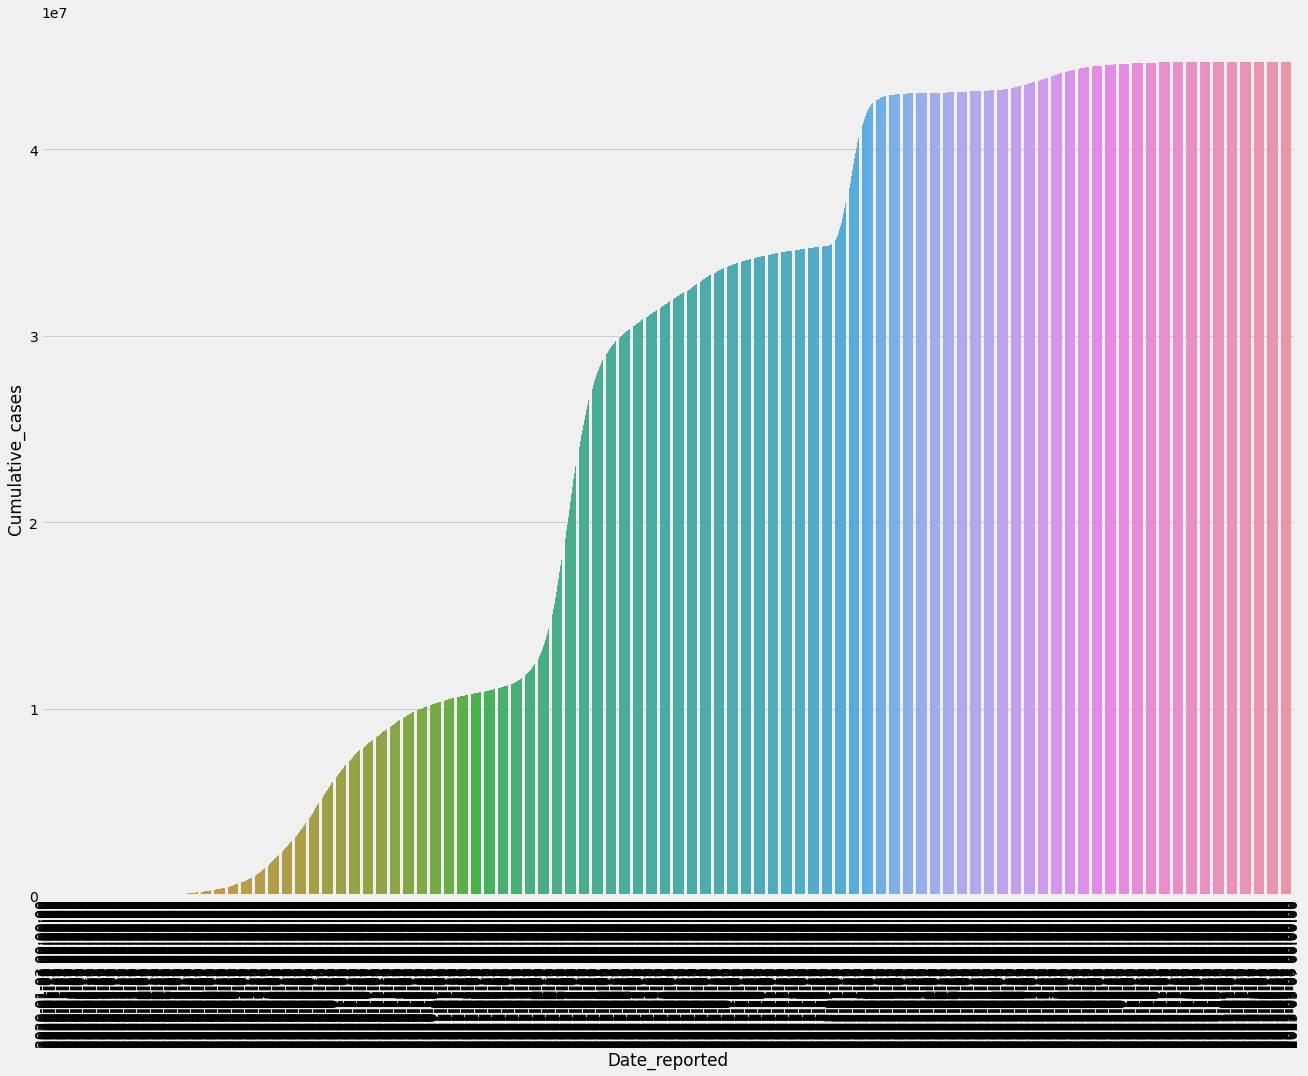

In [29]:
plt.figure(figsize=(20,15))
sns.barplot(x=covid.index,y=covid['Cumulative_cases'])
plt.xticks(rotation=90)
plt.show()

In [30]:
covid.columns

Index(['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'], dtype='object')

In [31]:
train = covid[covid.index<='2022-08-31']

In [32]:
test = covid[covid.index>'2022-08-31']

In [33]:
train.tail()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2022-08-27,9520,44398696,41,527597
2022-08-28,9436,44408132,157,527754
2022-08-29,7591,44415723,45,527799
2022-08-30,5439,44421162,30,527829
2022-08-31,7231,44428393,45,527874


In [40]:
test.head()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day
Date_reported,,,,,,,
2022-09-01,7946,44436339,37,527911,2022,9,1
2022-09-02,6168,44442507,21,527932,2022,9,2
2022-09-03,7211,44449718,25,527957,2022,9,3
2022-09-04,6817,44456535,34,527991,2022,9,4
2022-09-05,5910,44462445,16,528007,2022,9,5


In [35]:
def create_features(d):
    d = d.copy()
    d['Year'] = d.index.year
    d['Month'] = d.index.month
    d['Day'] = d.index.day
    return d

In [36]:
train = create_features(train)

In [37]:
test = create_features(test)

In [38]:
features = ['Day','Month','Year']
target = 'Cumulative_cases'

x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

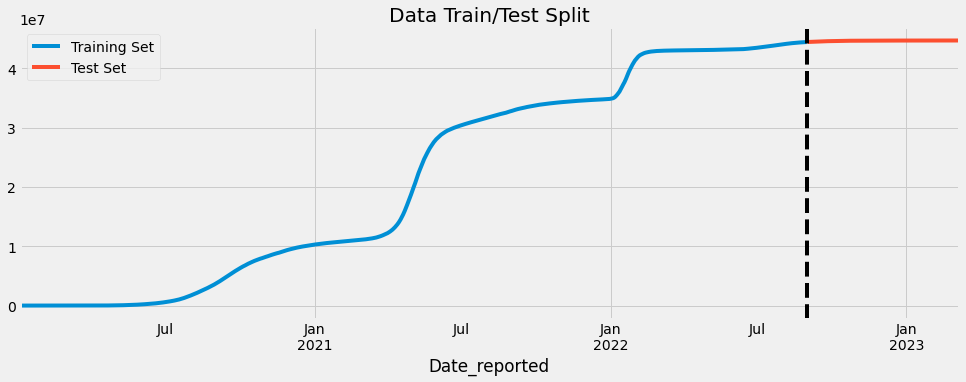

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))
train['Cumulative_cases'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Cumulative_cases'].plot(ax=ax, label='Test Set')
ax.axvline('2022-08-31', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [43]:
from prophet import Prophet

In [47]:
covid['Cumulative_cases']

Date_reported
2020-01-03           0
2020-01-04           0
2020-01-05           0
2020-01-06           0
2020-01-07           0
                ...   
2023-03-03    44687162
2023-03-04    44687496
2023-03-05    44687820
2023-03-06    44688101
2023-03-07    44688367
Name: Cumulative_cases, Length: 1160, dtype: int64

In [58]:
#new['ds'] = covid.index
new['y'] = covid['Cumulative_cases']

In [60]:
new['ds']=covid.index

In [62]:
new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1160 entries, 2020-01-03 to 2023-03-07
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       1160 non-null   int64         
 1   ds      1160 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 59.5 KB


In [85]:
model = Prophet(interval_width=1)
model.fit(new)
future = model.make_future_dataframe(periods=365)
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


,ds
1520,2024-03-02
1521,2024-03-03
1522,2024-03-04
1523,2024-03-05
1524,2024-03-06


In [86]:
forecast = model.predict(future)
forecast['yhat'] = forecast['yhat'].astype('int64')

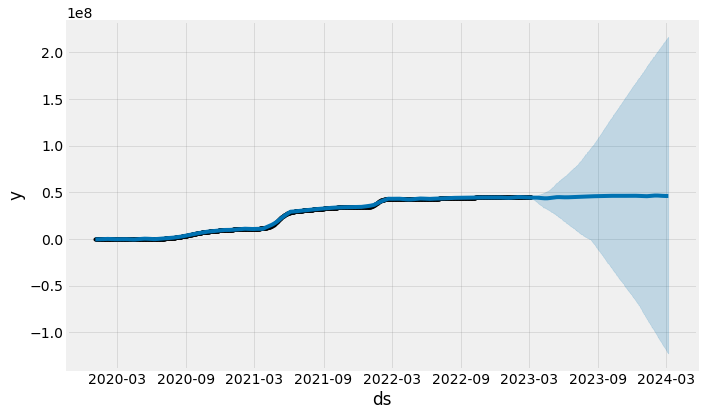

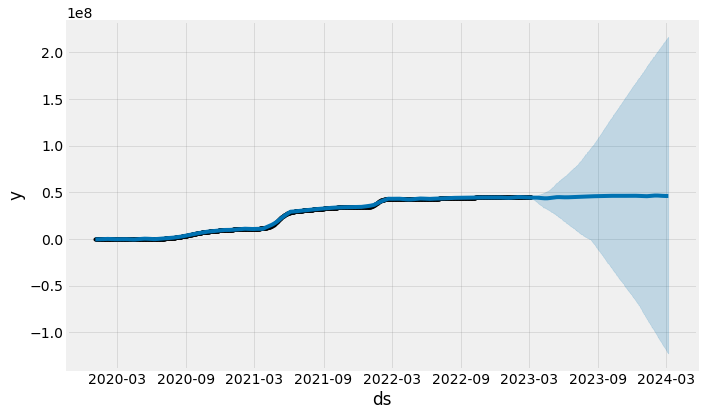

In [87]:
model.plot(forecast)

In [88]:
from prophet.plot import plot_plotly, add_changepoints_to_plot
from plotly.offline import iplot, init_notebook_mode
fig = plot_plotly(model,forecast) 
fig.update_layout(template='none')
iplot(fig) 

In [90]:
forecast[forecast['ds']=='2023-03-07']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1159,2023-03-07,4.481246e+07,4.371150e+07,4.551784e+07,4.481246e+07,4.481246e+07,-268133.329613,-268133.329613,-268133.329613,-1481.242192,-1481.242192,-1481.242192,-266652.087421,-266652.087421,-266652.087421,0.0,0.0,0.0,44544328


In [99]:
import xgboost as xgb

In [174]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=100,
                       objective='reg:linear',
                       eval_metric='rmse',
                       early_stopping_rounds=50,
                       max_depth=3,
                       learning_rate=0.4,
                      colsample_bytree=0.7)

from sklearn.model_selection import GridSearchCV
params = { 'max_depth': list(range(3,15)),
           'learning_rate': [0.01, 0.05, 0.1,0.4],
           'n_estimators': [100, 500, 1000,700],
           'colsample_bytree': [0.3, 0.7,1]}
clf = GridSearchCV(estimator=reg, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(x_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [175]:
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=10)

[19:52:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:16416819.47446	validation_1-rmse:27693298.90355
[10]	validation_0-rmse:1088575.08036	validation_1-rmse:3266649.36909
[20]	validation_0-rmse:689210.71072	validation_1-rmse:3293560.44297
[30]	validation_0-rmse:604728.60541	validation_1-rmse:3282571.80207
[40]	validation_0-rmse:589744.53976	validation_1-rmse:3276677.72342
[50]	validation_0-rmse:583675.79882	validation_1-rmse:3275869.85719
[60]	validation_0-rmse:578586.01048	validation_1-rmse:3271206.75833
[62]	validation_0-rmse:578518.58325	validation_1-rmse:3271747.74717


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=50,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [176]:
covid

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,prediction
Date_reported,,,,,
2020-01-03,0,0,0,0,NaN
2020-01-04,0,0,0,0,NaN
2020-01-05,0,0,0,0,NaN
2020-01-06,0,0,0,0,NaN
2020-01-07,0,0,0,0,NaN
...,...,...,...,...,...
2023-03-03,283,44687162,0,530772,42344116.0
2023-03-04,334,44687496,3,530775,42344116.0
2023-03-05,324,44687820,0,530775,42344116.0


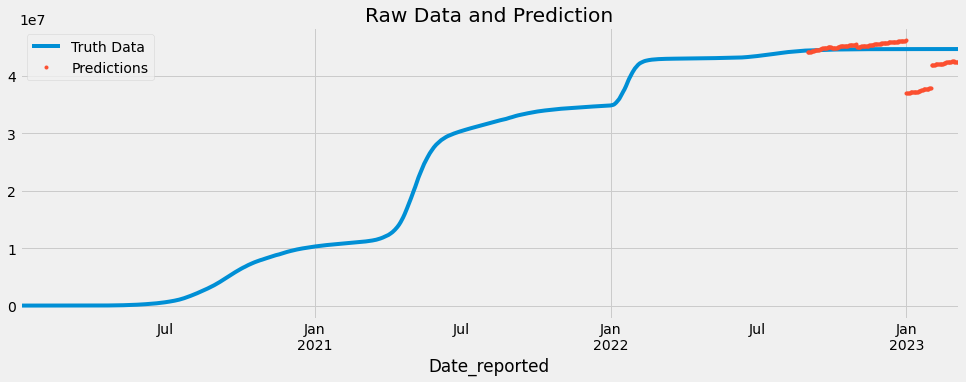

In [143]:
test['prediction'] = reg.predict(x_test)
covid = covid.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = covid[['Cumulative_cases']].plot(figsize=(15, 5))
covid['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [147]:
test['diff']=abs(test['Cumulative_cases']-test['prediction'])

In [148]:
test

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Year,Month,Day,prediction,diff
Date_reported,,,,,,,,,
2022-09-01,7946,44436339,37,527911,2022,9,1,44231684.0,204655.0
2022-09-02,6168,44442507,21,527932,2022,9,2,44231684.0,210823.0
2022-09-03,7211,44449718,25,527957,2022,9,3,44231684.0,218034.0
2022-09-04,6817,44456535,34,527991,2022,9,4,44231684.0,224851.0
2022-09-05,5910,44462445,16,528007,2022,9,5,44231684.0,230761.0
...,...,...,...,...,...,...,...,...,...
2023-03-03,283,44687162,0,530772,2023,3,3,42344116.0,2343046.0
2023-03-04,334,44687496,3,530775,2023,3,4,42344116.0,2343380.0
2023-03-05,324,44687820,0,530775,2023,3,5,42344116.0,2343704.0


In [149]:
y_pred = reg.predict(x_test)

In [150]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_pred,y_test)))

3207167.595088396


In [183]:
print("RMSE = {0:.3}".format(3207167.595088396/(44688367)))

RMSE = 0.0718


In [185]:
import pickle
pickle.dump(reg, open('/Users/shivamsourav/Desktop/covidmodel.pkl', 'wb'))

In [ ]:
model_train=covid.iloc[:int(covid.shape[0]*0.85)]
valid=covid.iloc[int(dat.shape[0]*0.85):]